In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 数据输入
df = pd.read_excel("C:/Users/JngyEn/Downloads/2024/C题/附件1.xlsx")

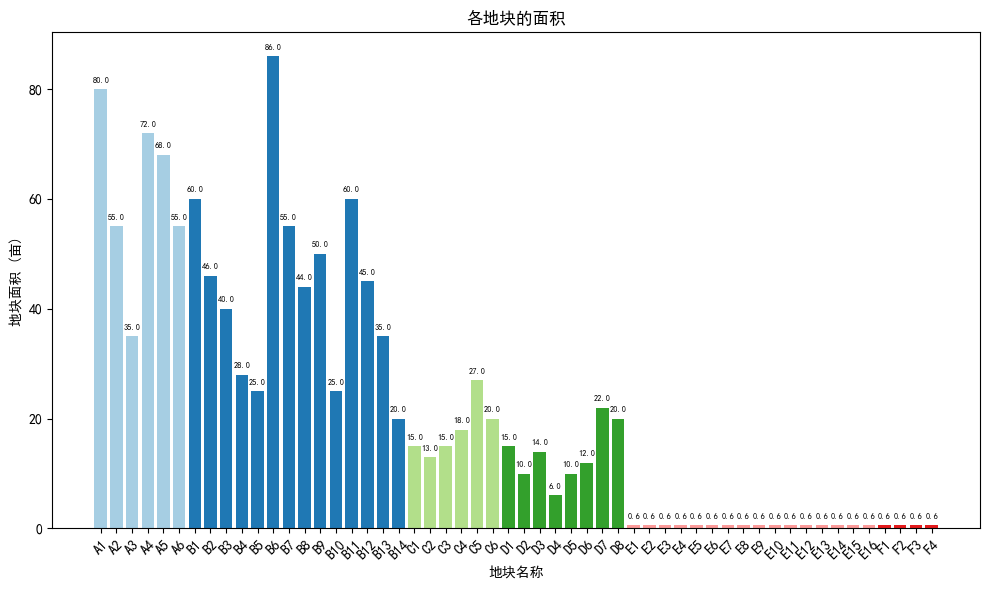

In [9]:


# 按地块类型分组，计算总面积
land_type_area = df.groupby('地块类型')['地块面积/亩'].sum()

# 创建颜色映射，根据地块类型分配颜色，确保同类型的颜色一致
unique_land_types = df['地块类型'].unique()
color_map = {land_type: color for land_type, color in zip(unique_land_types, plt.cm.Paired.colors)}

# 绘制柱状图
plt.figure(figsize=(10, 6))
bar_colors = [color_map[lt] for lt in df['地块类型']]
bars = plt.bar(df['地块名称'], df['地块面积/亩'], color=bar_colors)

# 添加柱状图顶部的数值标注，调整字体大小和粗细
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2),
             ha='center', va='bottom', fontsize=6, fontweight='light')  # 字体大小为8，字体为light

plt.title('各地块的面积')
plt.ylabel('地块面积 (亩)')
plt.xlabel('地块名称')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

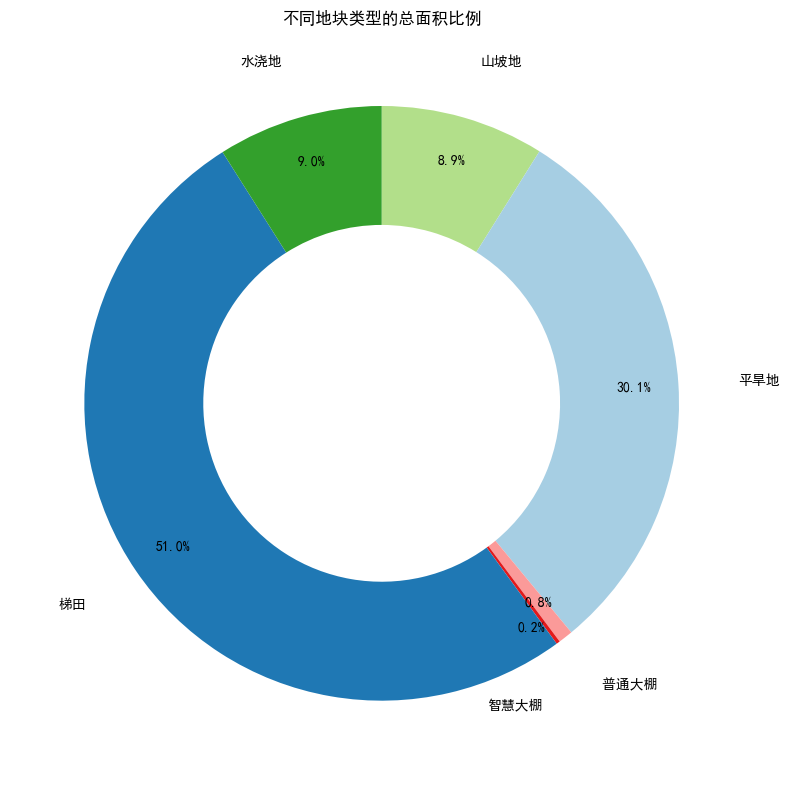

In [44]:
# 按地块类型分组，计算总面积
land_type_area = df.groupby('地块类型')['地块面积/亩'].sum()

# 创建颜色映射，根据地块类型分配颜色，确保同类型的颜色一致
unique_land_types = df['地块类型'].unique()
color_map = {land_type: color for land_type, color in zip(unique_land_types, plt.cm.Paired.colors)}

# 绘制环形图
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    land_type_area, labels=land_type_area.index, colors=[color_map[lt] for lt in land_type_area.index],
    autopct='%1.1f%%', startangle=90, labeldistance=1.2, pctdistance=0.85, counterclock=False,
    wedgeprops={'width': 0.4}, textprops=dict(fontsize=10)  # 设置字体大小
)

# 调整标签和百分比的字体大小
for text in texts:
    text.set_fontsize(10)  # 标签字体大小

for autotext in autotexts:
    autotext.set_fontsize(10)  # 百分比字体大小

# 防止标签重叠，通过将标签位置稍微调整远一点
for i, text in enumerate(texts):
    if text.get_text() == "智慧大棚":  # 检测标签是否为 "智慧大棚"
        # 将智慧大棚的标签移得更远
        text.set_position((text.get_position()[0]*0.5, text.get_position()[1]*1.05))
        autotexts[i].set_position((autotexts[i].get_position()[0]*1, autotexts[i].get_position()[1]*1.1))

       
plt.title('不同地块类型的总面积比例')
plt.tight_layout()
plt.show()